This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and structure index.

- $\rho$ vs $SI$

In [1]:
from astropy.table import Table, join
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# My progs
from CorrTest import NWSmooth, new_corr_test

In [2]:
# Radio-to-optical offset
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# SI data
si_x = Table.read("../data/si_k-all.fits")

# Cross-match
r2o_si = join(r2o, si_x, keys="iers_name")

print("Find structure index for {:d} sources.".format(len(r2o_si)))

Find structure index for 224 sources.


# 1. Overall distribution

In [3]:
# MI index at B-band
r2o_si.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor",
                     "ang_sep_k_cor", "nor_sep_k_cor",
                     "ang_sep_ka_cor", "nor_sep_ka_cor",
                     "si_med", "epo_med",
                     "si_c15", "epo_c15"])

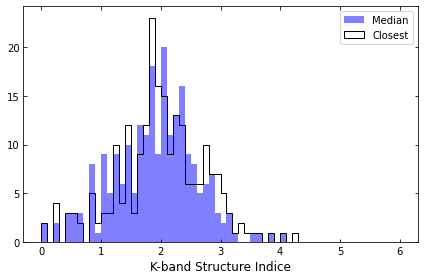

In [4]:
fig, ax0 = plt.subplots(figsize=(6, 4), ncols=1)

bins = np.arange(0, 6.1, 0.1)

ax0.hist(r2o_si["si_med"], bins=bins, histtype="stepfilled",
         color="b", alpha=0.5, label="Median")
ax0.hist(r2o_si["si_c15"], bins=bins, histtype="step",
         color="k", label="Closest")
ax0.set_xlabel("K-band Structure Indice", fontsize=12)

ax0.legend()

plt.tight_layout()

In [5]:
# SI in range of 2-4
mask = ((r2o_si["si_c15"] > 2) & (r2o_si["si_c15"] < 4))
num1 = len(r2o_si)
num2 = len(r2o_si[mask])
print("2<SI<4 for {:d} ({:0f}%) sources".format(num2, num2/num1*100))

2<SI<4 for 106 (47.321429%) sources


In [6]:
keys = "si_med"
r2o_si.sort(keys)

x1 = np.array(r2o_si[keys])
y_sx1 = np.array(r2o_si["ang_sep_sx_cor"])
y_k1 = np.array(r2o_si["ang_sep_k_cor"])
y_xka1 = np.array(r2o_si["ang_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)


keys = "si_c15"
r2o_si.sort(keys)

x2 = np.array(r2o_si[keys])
y_sx2 = np.array(r2o_si["ang_sep_sx_cor"])
y_k2 = np.array(r2o_si["ang_sep_k_cor"])
y_xka2 = np.array(r2o_si["ang_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

Angular separation vs. SI (Left: Median; Right: J2016) in linear scale


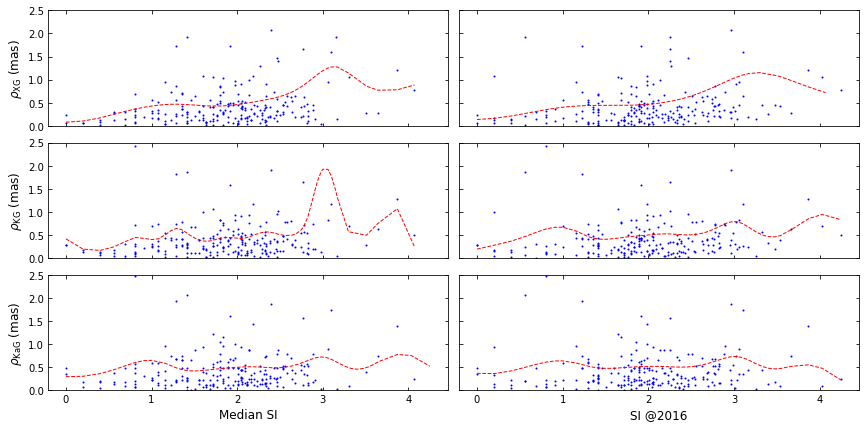

In [7]:
print("Angular separation vs. SI (Left: Median; Right: J2016) in linear scale")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(figsize=(12, 6),
                                                         nrows=3, ncols=2,
                                                         sharex=True, sharey=True)

ax0.plot(r2o_si["si_med"], r2o_si["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_si["si_c15"], r2o_si["ang_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_si["si_med"], r2o_si["ang_sep_k_cor"], "b.", ms=2)
ax3.plot(r2o_si["si_c15"], r2o_si["ang_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_si["si_med"], r2o_si["ang_sep_ka_cor"], "b.", ms=2)
ax5.plot(r2o_si["si_c15"], r2o_si["ang_sep_ka_cor"], "b.", ms=2)

# Smoothed data
ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x1, nw_mean_k1, "r--", lw=1)
ax2.plot(x1, nw_mean_xka1, "r--", lw=1)
ax3.plot(x2, nw_mean_sx2, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x2, nw_mean_xka2, "r--", lw=1)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax4.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax4.set_xlabel("Median SI", fontsize=12)
ax5.set_xlabel("SI @2016", fontsize=12)

ax0.set_ylim([0, 2.5])

plt.subplots_adjust()
plt.tight_layout()

Angular separation vs. SI (Left: Median; Right: J2015) in log-scale


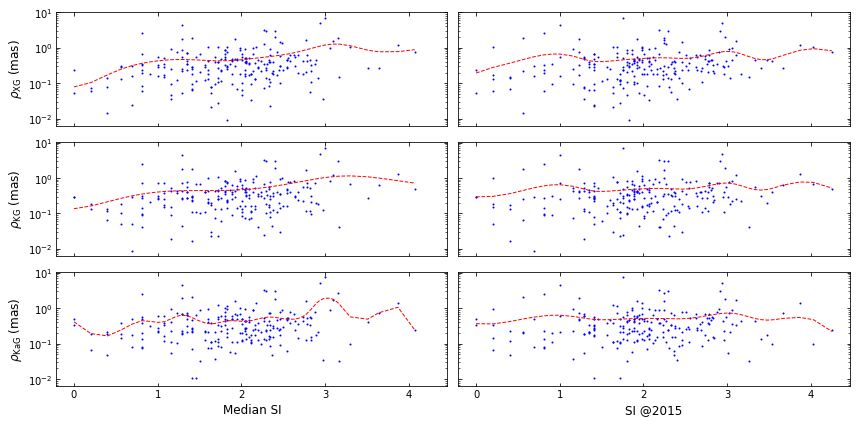

In [8]:
print("Angular separation vs. SI (Left: Median; Right: J2015) in log-scale")

# Distribution of angular separation
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(figsize=(12, 6),
                                                         nrows=3, ncols=2,
                                                         sharex=True, sharey=True)

ax0.plot(r2o_si["si_med"], r2o_si["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_si["si_c15"], r2o_si["ang_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_si["si_med"], r2o_si["ang_sep_k_cor"], "b.", ms=2)
ax3.plot(r2o_si["si_c15"], r2o_si["ang_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_si["si_med"], r2o_si["ang_sep_ka_cor"], "b.", ms=2)
ax5.plot(r2o_si["si_c15"], r2o_si["ang_sep_ka_cor"], "b.", ms=2)

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax4.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax4.set_xlabel("Median SI", fontsize=12)
ax5.set_xlabel("SI @2015", fontsize=12)

# Smoothed data
ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax2.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x1, nw_mean_xka1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax3.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x2, nw_mean_xka2, "r--", lw=1)

ax0.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

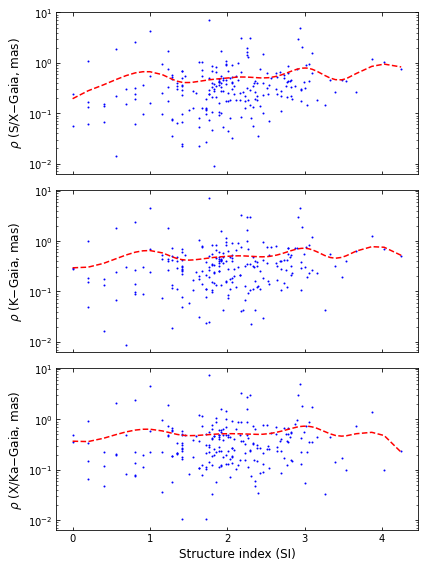

In [9]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x2, y_sx2, "b.", ms=2)
ax1.plot(x2, y_k2, ".b", ms=2)
ax2.plot(x2, y_xka2, "b.", ms=2)

# Smoothed data
ax0.plot(x2, nw_mean_sx2, "r--")
ax1.plot(x2, nw_mean_k2, "r--")
ax2.plot(x2, nw_mean_xka2, "r--")

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("Structure index (SI)", fontsize=12)

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

In [10]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="Rho vs. SI-median (K)",
              ylabel=["SX", "K", "XKa"])

Rho vs. SI-median (K)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +2.1e-01   2.0e-03  +2.4e-01   2.3e-04  +1.7e-01   2.3e-04
K           +2.0e-01   3.1e-03  +2.1e-01   1.5e-03  +1.4e-01   1.6e-03
XKa         +1.7e-01   1.0e-02  +1.5e-01   3.0e-02  +1.0e-01   2.7e-02
-----------------------------------------------------------------
Smoothed
SX          +8.3e-01   6.0e-57  +8.9e-01   6.9e-77  +7.7e-01   1.6e-63
K           +8.7e-01   7.9e-71  +1.0e+00  1.2e-240  +9.8e-01  1.9e-102
XKa         +5.2e-01   1.1e-16  +5.4e-01   2.2e-18  +4.3e-01   4.5e-21
-----------------------------------------------------------------


In [11]:
new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="Rho vs. SI@2015 (K)",
              ylabel=["SX", "K", "XKa"])

Rho vs. SI@2015 (K)
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +8.8e-02   1.9e-01  +2.4e-01   3.0e-04  +1.6e-01   2.9e-04
K           +6.5e-02   3.3e-01  +1.8e-01   6.3e-03  +1.3e-01   5.5e-03
XKa         +3.5e-02   6.0e-01  +9.1e-02   1.8e-01  +6.2e-02   1.7e-01
-----------------------------------------------------------------
Smoothed
SX          +6.4e-01   3.6e-27  +6.3e-01   5.3e-26  +5.7e-01   4.8e-36
K           +5.9e-01   1.7e-22  +5.9e-01   2.2e-22  +5.2e-01   8.3e-30
XKa         +4.0e-01   3.9e-10  +4.1e-01   2.3e-10  +3.4e-01   4.1e-14
-----------------------------------------------------------------


# 4. SI > 3

In [12]:
# SI > 3
mask = (r2o_si["si_c15"] > 3)
r2o_si_lt3 = r2o_si[mask]

num1 = len(r2o_si_lt3)
num2 = len(r2o_si)
print("{} ({:.0f}%) sources with SI > 3".format(num1, num1/num2*100))

17 (8%) sources with SI > 3


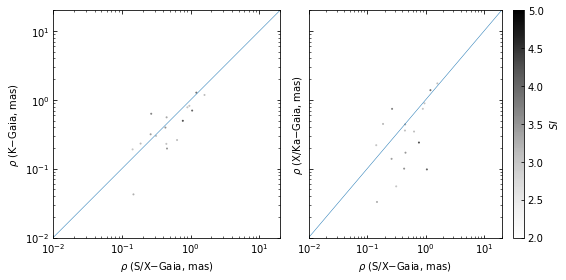

In [13]:
r2o_si_lt3.sort("si_c15")

# Distribution of angular separation
fig, ((ax0, ax1)) = plt.subplots(
    figsize=(8, 4), ncols=2, sharex=True, sharey=True)

sc0 = ax0.scatter(r2o_si_lt3["ang_sep_sx_cor"], r2o_si_lt3["ang_sep_k_cor"], 
                  c=r2o_si_lt3["si_c15"],
                  s=1, vmin=2, vmax=5, cmap="Greys")
# plt.colorbar(sc0, label="$SI$", fraction=0.1, ax=ax0)

sc1 = ax1.scatter(r2o_si_lt3["ang_sep_sx_cor"], r2o_si_lt3["ang_sep_ka_cor"], 
                  c=r2o_si_lt3["si_c15"],
                  s=1, vmin=2, vmax=5, cmap="Greys")
plt.colorbar(sc1, label="$SI$", fraction=0.1, ax=ax1)

ax0.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax0.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax1.set_xlabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")

ax0.set_xlim([0.01, 20])
ax0.set_ylim([0.01, 20])
ax0.set_xscale("log")
ax0.set_yscale("log")

x = np.linspace(0.01, 20, 100)
ax0.plot(x, x, lw=0.5)
ax1.plot(x, x, lw=0.5)

plt.subplots_adjust()
plt.tight_layout()